<a href="https://colab.research.google.com/github/michaelherediaperez/mecanica_de_solidos_un/blob/main/codigos/cap_04/04_03_03_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.3.3. Ley de Hooke generalizada para materiales isótropos

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Julio 20, 2022 | Conversión de código de MAXIMA a Python|

## Coeficientes de la matriz constitutiva $D$

In [1]:
from sympy import *
init_printing()

Se definen las variables

In [2]:
ex, ey, ez     = symbols("varepsilon_x, varepsilon_y, varepsilon_z")
sx, sy, sz     = symbols("sigma_x, sigma_y, sigma_z")
E, nu, lamb_da = symbols("E, nu, lambda")
txy, txz, tyz  = symbols("tau_xy, tau_xz, tau_yz")
gxy, gxz, gyz  = symbols("gamma_xy, gamma_xz, gamma_yz")

ex, ey, ez, sx, sy, sz, E, nu, lamb_da, txy, txz, tyz, gxy, gxz, gyz

Se define la delatación cúbica (eq. 4.28)

In [3]:
e = ex + ey + ez
e

Las constantes de Lamé

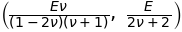

In [4]:
lamb_da = nu*E / ((1+nu) * (1-2*nu))    # eq. 4.15
G = E / (2 * (1+nu))                    # eq 4.8

lamb_da, G

Se definen las ecuaciones de Lamé (eq 4.14), recordadno que deben estar igualadas a cero.

In [5]:
sx = lamb_da*e + 2*G*ex
sy = lamb_da*e + 2*G*ey
sz = lamb_da*e + 2*G*ez

txy = G*gxy
txz = G*gxz
tyz = G*gyz

Se despeja la matriz constitutiva $D$ para el caso isótropo. En MAXIMA se emplea el comando ```coefmatrix```, pero en sympy tenemos ```linear_eq_to_matrix()```.

In [6]:
D = linear_eq_to_matrix([sx, sy, sz, txy, txz, tyz], (ex, ey, ez, gxy, gxz, gyz))
D

⎛⎡       E⋅ν            2⋅E                E⋅ν                          E⋅ν   
⎜⎢───────────────── + ───────       ─────────────────            ─────────────
⎜⎢(1 - 2⋅ν)⋅(ν + 1)   2⋅ν + 2       (1 - 2⋅ν)⋅(ν + 1)            (1 - 2⋅ν)⋅(ν 
⎜⎢                                                                            
⎜⎢            E⋅ν                     E⋅ν            2⋅E                E⋅ν   
⎜⎢     ─────────────────       ───────────────── + ───────       ─────────────
⎜⎢     (1 - 2⋅ν)⋅(ν + 1)       (1 - 2⋅ν)⋅(ν + 1)   2⋅ν + 2       (1 - 2⋅ν)⋅(ν 
⎜⎢                                                                            
⎜⎢            E⋅ν                          E⋅ν                     E⋅ν        
⎜⎢     ─────────────────            ─────────────────       ───────────────── 
⎜⎢     (1 - 2⋅ν)⋅(ν + 1)            (1 - 2⋅ν)⋅(ν + 1)       (1 - 2⋅ν)⋅(ν + 1) 
⎜⎢                                                                            
⎜⎢                                                  